# Rayleigh-Range Estimator, especially for SPIMs #


#### Rayleigh-Range: ####

$$ z_r = \frac{n\cdot \pi \cdot \omega_o^2}{\lambda_0} $$

#### Beam profile: ####

$$ \omega (z)  = \omega_0 \cdot \sqrt{1+\left(\frac{z-z_0}{z_R}\right)^2}$$

$ \omega_0 $ is the waist radius at $1/e$ E-Field or $1/e^2$ intensity, conversion into FWHM:

$$ FWHM = \sqrt{2 \cdot \ln(2)}\cdot \omega_0 \approx 1.178 \cdot \omega_0$$

In [1]:
#import pylab
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('dark_background')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
n = 1.45
omega0 = np.linspace(1,100,1000)

In [3]:
def rayleigh_range(index, wavelength, omega0):
    return np.divide(index*np.pi*np.power(omega0,2),wavelength)

/home/fabian/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


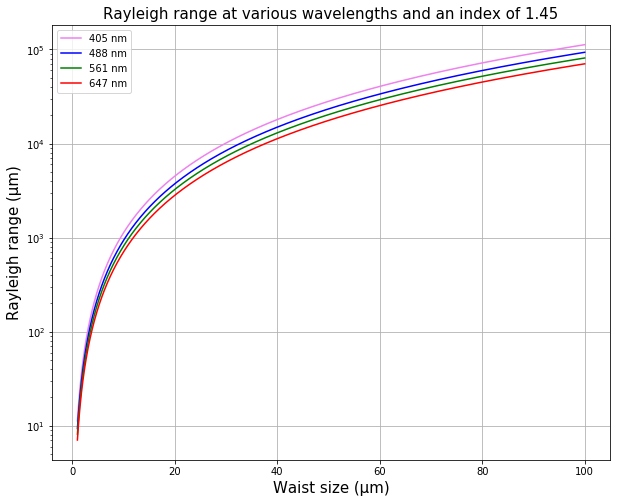

In [7]:
fig = plt.figure()

titlestring =  'Rayleigh range at various wavelengths and an index of ' + str(n)

plt.title(titlestring,fontsize=15)
plt.grid(True)

fig.set_size_inches(10, 8)
ax = fig.add_subplot(111)
plot(omega0, rayleigh_range(n,0.405,omega0), 'violet', label='405 nm')
plot(omega0, rayleigh_range(n,0.488,omega0), 'b', label='488 nm')
plot(omega0, rayleigh_range(n,0.561,omega0), 'g', label='561 nm')
plot(omega0, rayleigh_range(n,0.647,omega0), 'r', label='647 nm')

legend = ax.legend()
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Waist size (µm)')
ax.set_ylabel('Rayleigh range (µm)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

(8, 1200)

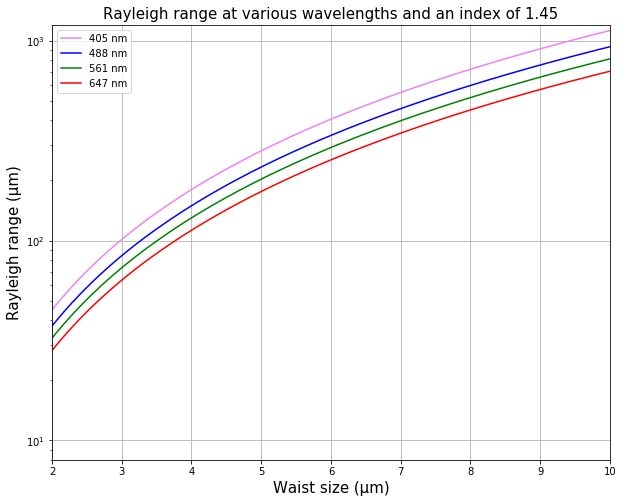

In [5]:
fig = plt.figure()

titlestring =  'Rayleigh range at various wavelengths and an index of ' + str(n)

plt.title(titlestring,fontsize=15)
plt.grid(True)

fig.set_size_inches(10, 8)
ax = fig.add_subplot(111)
plot(omega0, rayleigh_range(n,0.405,omega0), 'violet', label='405 nm')
plot(omega0, rayleigh_range(n,0.488,omega0), 'b', label='488 nm')
plot(omega0, rayleigh_range(n,0.561,omega0), 'g', label='561 nm')
plot(omega0, rayleigh_range(n,0.647,omega0), 'r', label='647 nm')

legend = ax.legend()
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Waist size (µm)')
ax.set_ylabel('Rayleigh range (µm)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.set_xlim(2,10)
ax.set_ylim(8,1200)

In [6]:
rayleigh_range(1.45,0.647,10)

704.06635976896439

In [7]:
def FWHM_to_omega0(FWHM):
    return np.multiply(FWHM,0.8493218)

In [8]:
rayleigh_range(1.45,0.488,FWHM_to_omega0(5))

168.3381711370937

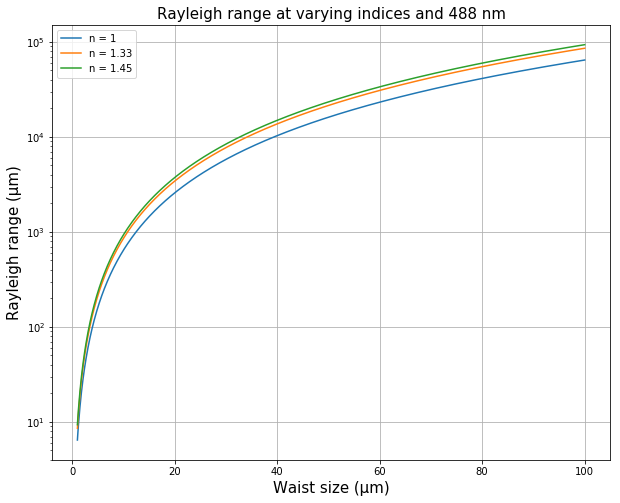

In [9]:
fig = plt.figure()

titlestring =  'Rayleigh range at varying indices and 488 nm'

plt.title(titlestring,fontsize=15)
plt.grid(True)

fig.set_size_inches(10, 8)
ax = fig.add_subplot(111)
plot(omega0, rayleigh_range(1.0,0.488,omega0), label='n = 1')
plot(omega0, rayleigh_range(1.33,0.488,omega0), label='n = 1.33')
plot(omega0, rayleigh_range(1.45,0.488,omega0), label='n = 1.45')

legend = ax.legend()
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Waist size (µm)')
ax.set_ylabel('Rayleigh range (µm)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

### Estimation of the field of sharp focus (FoSF) according to Leischner et al, 2009

[Link to the Paper:](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0005785) Leischner, U., Zieglgansberger, W., and Dodt, H.U. (2009). Resolution of ultra-
microscopy and field of view analysis. PLoS One 4, e5785.

Field of sharp focus
$$ FoSF = 7,58 \cdot \lambda \cdot \left(\frac{f_{cy}}{SD}\right)^2\cdot n = 7,58 \cdot \lambda \cdot \left(\frac{2}{NA}\right)^2\cdot n 
$$
Resolution of the light-sheet:
$$ \Delta x = \frac{2 \cdot \lambda}{NA}$$

Taken together:
$$ \Delta x = \sqrt{\frac{FoSF \cdot \lambda}{7,58 \cdot n}}$$
or:
$$ FoSF = \frac{7,58 \cdot \Delta x^2 \cdot n}{\lambda}$$

In [8]:
def fosf(index, wavelength, delta_x):
    return np.divide(index*7.58*np.power(delta_x,2),wavelength)

In [17]:
fosf(1.45, 0.488, 2.107)

99.98767204713117

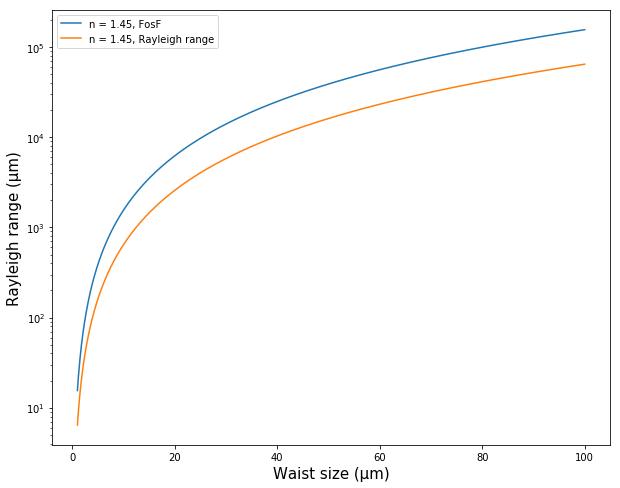

In [51]:
fig = plt.figure()

#titlestring =  'Rayleigh range vs. Leischner FoSF estimation'


#plt.title(titlestring,fontsize=15)
#plt.grid(True)

fig.set_size_inches(10, 8)
ax = fig.add_subplot(111)

ax.plot(omega0, fosf(1.0,0.488,omega0), label='n = 1.45, FosF')
ax.plot(omega0, rayleigh_range(1.0,0.488,omega0), label='n = 1.45, Rayleigh range')

legend = ax.legend()
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Waist size (µm)')
ax.set_ylabel('Rayleigh range (µm)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)